# LangGraph - Eine Einführung

Bis jetzt haben wir uns mit einem einzigen Agenten zufrieden gegeben. Aber wir können die Power der Agenten multiplizieren, wenn wir uns ein Agentensystem bauen!
Stell dir vor, du hast ein System, in dem für jede Aufgabe ein spezialisierter Agent zuständig ist. Komplexe Aufgaben werden z.B. durch einen Planer-Agent in Teilaufgaben heruntergebrochen und auf andere spezialisierte Agenten verteilt. Ein Koordinator kümmert sich um die Zusammenarbeit und trägt die Einzelergebnisse zusammen.

Das ist meines Erachtens die Zukunft. Stand heute Mitte 2024 gibt es diese Systeme schon, wenn auch nicht immer perfekt funktionierend. Aber die Entwicklung geht rasant voran und ich bin überzeugt, dass wir bald sehr gute Agentensysteme haben werden.

Aber so ein System ist komplex und es wäre sicher nicht sinnvoll das alles selber programmieren zu wollen. Deswegen möchten wir LangGraph kennenlernen und nutzen.

## Was ist LangGraph?

Laut der Beschreibung von den LangGraph-Machern selbst: 
> "LangGraph is a library for building stateful, multi-actor applications with LLMs, used to create agent and multi-agent workflows. "

Also handelt es sich um eine Bibliothek mit der wir Multi-Agenten Systeme und Workflows bauen können! Mehr Details hier: https://langchain-ai.github.io/langgraph/

Wir werden auch gleich sehen, dass die Programmierung eines Agentensystems auf Basis von LangGraph viel mit der Definition eines Workflowsystems zu tun hat.

Ein paar Zeilen Code sagen mehr als tausend Worte (berühmtes Zitat von S. Grünheit)... Lasst uns das Hallo-Welt der KIs bauen: einen Chatbot!

In [1]:
!pip install langgraph langchain_openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.0/89.0 kB 1.9 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.1 -> 24.1.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import os
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI

load_dotenv()
os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")

model = ChatOpenAI(model="gpt-4o")

In [3]:
from typing import Annotated
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages


class State(TypedDict):
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)

In [4]:
def chatbot(state: State):
    return {"messages": [model.invoke(state["messages"])]}


# Das erste Argument ist der Name des Knotens.
# Das zweite Argument ist die Funktion, die aufgerufen wird, wenn
# der Knoten erreicht wird.
graph_builder.add_node("chatbot", chatbot)

In [6]:
graph_builder.add_edge(START, "chatbot")

graph_builder.add_edge("chatbot", END)

In [7]:
graph = graph_builder.compile()

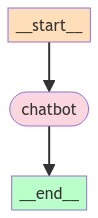

In [8]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [9]:
while True:
    user_input = input("User: ")
    if user_input.lower() in ["quit", "exit", "q"]:
        print("Tschüss!")
        break
    for event in graph.stream({"messages": ("user", user_input)}):
        for value in event.values():
            print("Agent:", value["messages"][-1].content)

Agent: Hello! How can I assist you today?
Agent: Sure, here's a light-hearted joke for you:

Why don’t scientists trust atoms?

Because they make up everything!
Tschüss!


Ok zugegeben, das war eine Menge Code für einen Chatbot!

Aber es zeigt zumindest einigermaßen, wie LangGraph tickt. Wir haben also offensichtlich einen Grafen, wo die Knoten Agentenfunktionen abbilden.